In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import keras_utils
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
import os 
import cv2

1.14.0
2.2.4


In [18]:
DataDir = "/home/jjespper/masterIronhack/Proyecto_Final_IH/Proyecto_clasificador_imagenesmovil/mobile_gallery_image_classification"

categories = ['Cars', 'Memes', 'Mountains', 'Selfies', 'Trees', 'Whatsapp_Screenshots']

In [19]:
'''train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True)
        featurewise_center=False,               # se pone la media a 0 en todo el dataset
        samplewise_center=False,                # se pone la media a 0 de la muestra
        featurewise_std_normalization=False,    # se divide entre la std del dataset
        samplewise_std_normalization=False,     # se divide cada entrada entre std
        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)
        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)
        zoom_range=0.1,                         # zoom aleatorio 
        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)
        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)
        horizontal_flip=False,                  # giro aleatorio horizantal
        vertical_flip=False)   
'''
  

'train_datagen = ImageDataGenerator(\n        rescale=1./255,\n        #shear_range=0.2,\n        #zoom_range=0.2,\n        #horizontal_flip=True)\n        featurewise_center=False,               # se pone la media a 0 en todo el dataset\n        samplewise_center=False,                # se pone la media a 0 de la muestra\n        featurewise_std_normalization=False,    # se divide entre la std del dataset\n        samplewise_std_normalization=False,     # se divide cada entrada entre std\n        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)\n        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)\n        zoom_range=0.1,                         # zoom aleatorio \n        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)\n        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)\n        ho

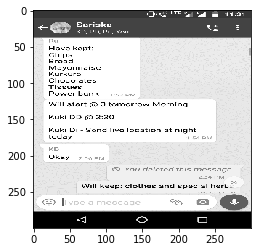

In [20]:
img_ancho = 300
img_alto = 300

for category in categories:
    path = os.path.join(DataDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array, (img_ancho, img_alto))
        plt.imshow(new_array, cmap ='gray')
        plt.show


In [21]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True)
        featurewise_center=False,               # se pone la media a 0 en todo el dataset
        samplewise_center=False,                # se pone la media a 0 de la muestra
        featurewise_std_normalization=False,    # se divide entre la std del dataset
        samplewise_std_normalization=False,     # se divide cada entrada entre std
        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)
        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)
        zoom_range=0.1,                         # zoom aleatorio 
        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)
        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)
        horizontal_flip=False,                  # giro aleatorio horizantal
        vertical_flip=False)   

In [22]:
datagen = train_datagen.flow_from_directory('/home/jjespper/masterIronhack/Proyecto_Final_IH/Proyecto_clasificador_imagenesmovil/mobile_gallery_image_classification', 
                    target_size=(300, 300), color_mode='grayscale',batch_size=32)


Found 1266 images belonging to 6 classes.


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

In [23]:
dim_input = (300, 300, 1)
n_clases = 6

In [ ]:
'''modelo=Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=dim_entrada))
modelo.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
modelo.add(MaxPool2D((2, 2)))
modelo.add(Dropout(0.20))
modelo.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
modelo.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
modelo.add(MaxPool2D(pool_size=(2, 2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
modelo.add(Dropout(0.25))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.25))
modelo.add(Dense(n_clases, activation='softmax'))
modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy']) 
reduccion_tasa_apr=ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.0001)'''

In [ ]:
'''def make_model():

    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = dim_input, activation='relu'))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
      
    model.add(MaxPooling2D(pool_size=(2,2)))   
    
    model.add(Dropout(0.20))
        
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(32, activation='relu'))

    model.add(Dropout(0.25))

    model.add(Dense(n_clases, activation='softmax'))

    return model

#datagen.

ACC = 0,08
'''


In [30]:
def make_model():

    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = dim_input, activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))   
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
      
    model.add(MaxPooling2D(pool_size=(2,2)))   
    
    model.add(Dropout(0.20))
        
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    
    model.add(Flatten())

    #model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.25))

    model.add(Dense(n_clases, activation='softmax'))

    return model

#datagen.

#ACC = 0,08


In [31]:
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 300, 300, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 128)       147584    
__________

In [32]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 12
#EPOCHS = 25

In [33]:
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)


In [34]:
len(datagen)

40

In [35]:
model.fit_generator(datagen, steps_per_epoch = len(datagen), epochs=10)

Epoch 1/10
10/40 [======>.......................] - ETA: 2:22 - loss: 1.8737 - acc: 0.2000

/home/jjespper/miniconda3/envs/py36/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


40/40 [==============================] - 173s 4s/step - loss: 1.7852 - acc: 0.2436
Epoch 2/10
40/40 [==============================] - 166s 4s/step - loss: 1.5299 - acc: 0.4076
Epoch 3/10
40/40 [==============================] - 169s 4s/step - loss: 1.2724 - acc: 0.5201
Epoch 4/10
40/40 [==============================] - 164s 4s/step - loss: 1.0450 - acc: 0.6206
Epoch 5/10
40/40 [==============================] - 165s 4s/step - loss: 0.9135 - acc: 0.6634
Epoch 6/10
40/40 [==============================] - 165s 4s/step - loss: 0.8159 - acc: 0.7137
Epoch 7/10
40/40 [==============================] - 188s 5s/step - loss: 0.7639 - acc: 0.7302
Epoch 8/10
40/40 [==============================] - 181s 5s/step - loss: 0.7825 - acc: 0.7200
Epoch 9/10
40/40 [==============================] - 180s 5s/step - loss: 0.6828 - acc: 0.7700
Epoch 10/10
40/40 [==============================] - 196s 5s/step - loss: 0.6012 - acc: 0.7872


In [37]:
model.evaluate_generator()

TypeError: evaluate_generator() missing 1 required positional argument: 'generator'

In [ ]:
from google.cloud import vision


In [ ]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')

    for label in labels:
        print(label.description)

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('my_webcam_gray', gray)
    #cv2.imshow('my_webcam_original', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# DETECTOR DE IMAGENES (google)

In [ ]:
THRESHOLD = 0.8

class_names = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

model = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb',
                                      'ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    model.setInput(cv2.dnn.blobFromImage(frame, size=(300, 300), swapRB=True))
    
    output = model.forward()[0,0,:,:]
    
    for detection in output:
        confidence = detection[2]
        if confidence > THRESHOLD:
            class_id = detection[1]
            class_name = class_names[class_id]
            # print(confidence, class_name)
            
            # rectangles!
            
            box_x=detection[3]
            box_y=detection[4]
            box_width=detection[5]
            box_height=detection[6]
            
            height, width, ch = frame.shape
            
            box_x = detection[3] * width
            box_y = detection[4] * height
            box_width = detection[5] * width
            box_height = detection[6] * height
                                          
            cv2.rectangle(frame, 
                          (int(box_x),
                           int(box_y)),
                          (int(box_width),
                           int(box_height)),
                          (0, 0, 255), 
                          thickness=2)
            
            cv2.putText(frame, 
                        class_name + ' ' + str(round(confidence, 2)),
                        (int(box_x), 
                         int(box_y+.05*height)),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1,
                        (0, 0, 255))
    
    cv2.imshow('object_detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()